In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data.csv')
df['ln_units'] = np.log(df['units'])
df.head()

,Graph ID,Tree decomposition ID,run time,units,Tree Width,Decomposition Overhead Ratio,Average Depth,Join Percentage,Forget Percentage,Introduce Percentage,Leaf Percentage,Sum of Join node distances,Branching Factor,Bag Adjacency Factor,Bag Connectedness Factor,Bag Neighborhood Coverage Factor,ln_units
0,1,1,2,2696,2.0,1.9,3.777778,0.222222,0.055556,0.000000,0.444444,36.0,1.800000,0.851852,0.388889,3.074074,7.899524
1,1,2,2,2951,2.0,1.9,3.722222,0.111111,0.000000,0.055556,0.388889,4.0,1.636364,0.851852,0.388889,3.166667,7.989899
2,1,3,1,2820,2.0,1.9,5.000000,0.166667,0.055556,0.055556,0.333333,8.0,1.500000,0.851852,0.388889,3.166667,7.944492
3,1,4,9,2568,2.0,1.9,6.777778,0.166667,0.166667,0.055556,0.333333,8.0,1.500000,0.851852,0.388889,3.074074,7.850883
4,1,5,8,2826,2.0,1.9,5.500000,0.166667,0.055556,0.055556,0.388889,8.0,1.636364,0.851852,0.388889,3.166667,7.946618


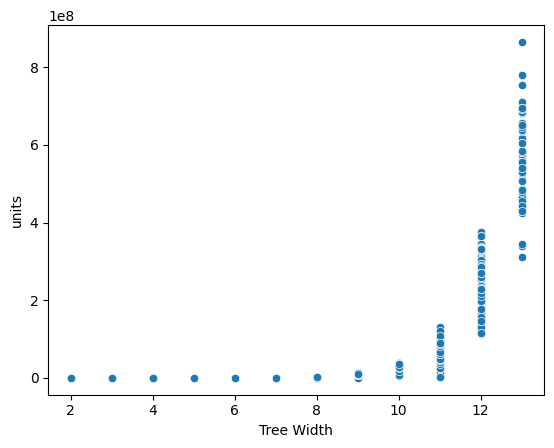

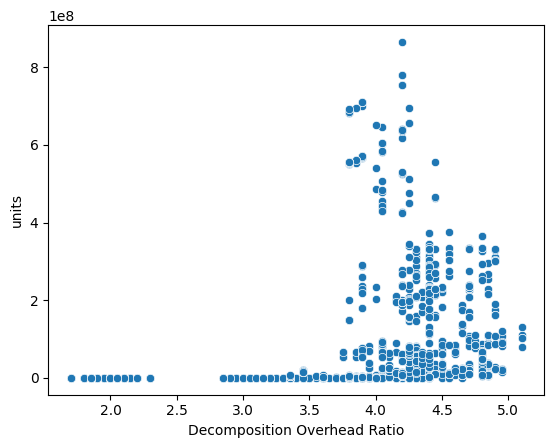

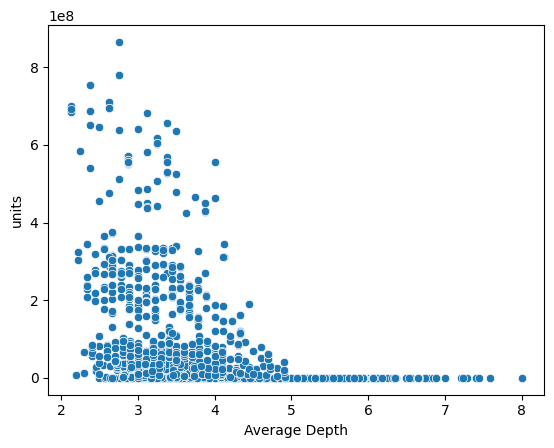

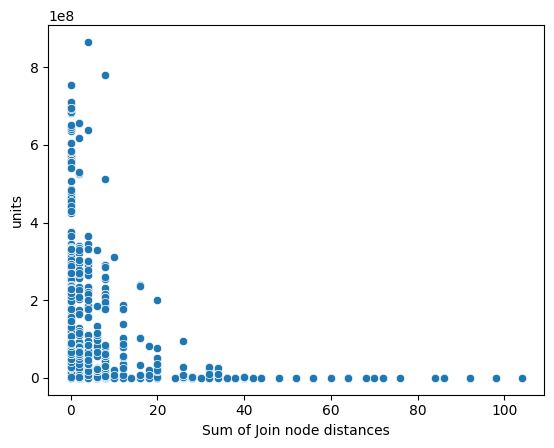

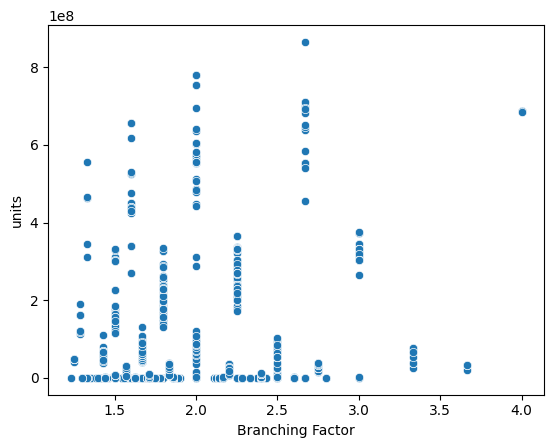

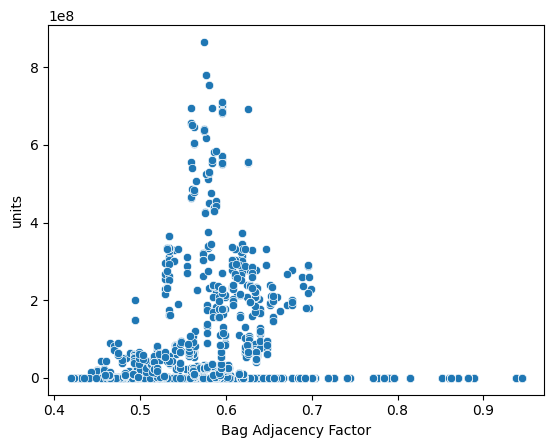

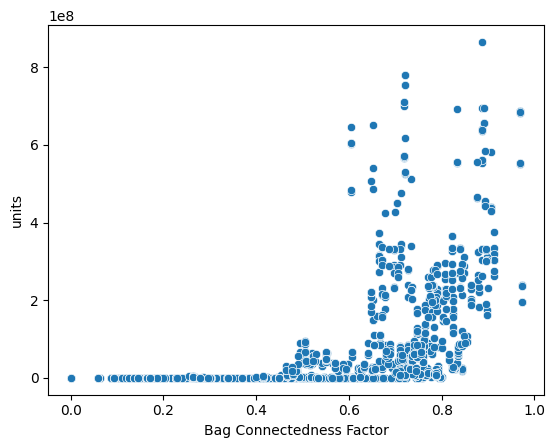

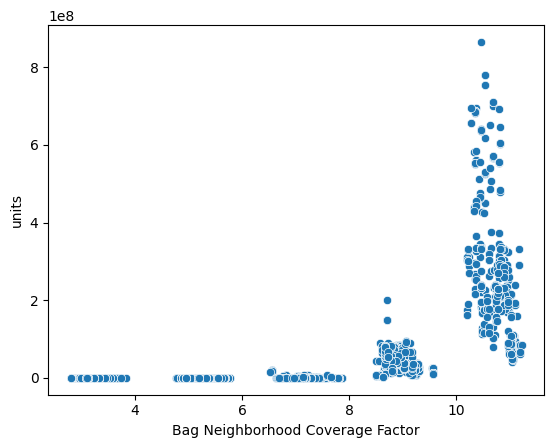

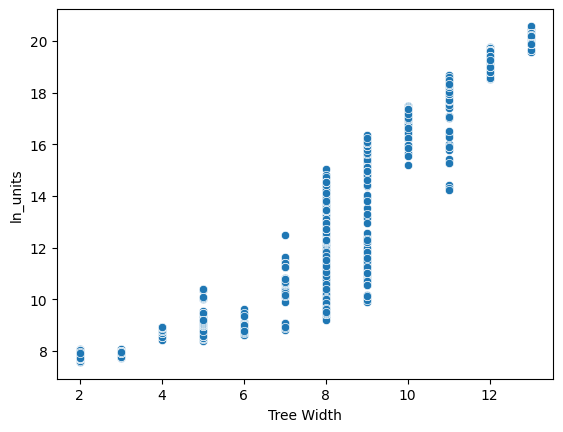

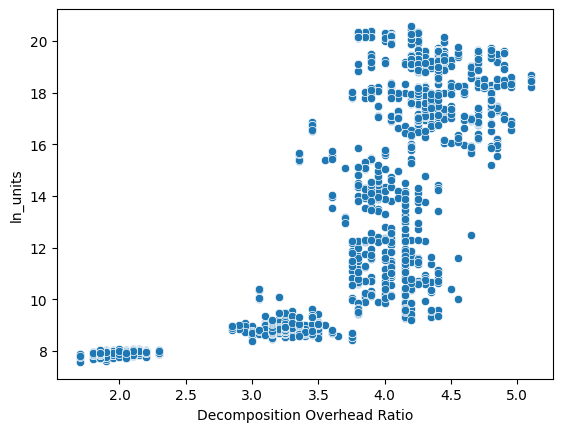

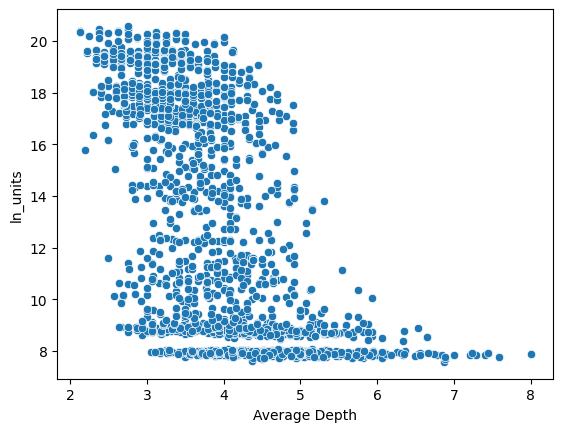

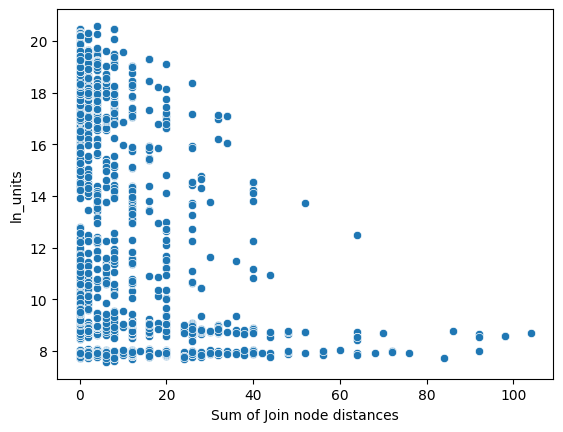

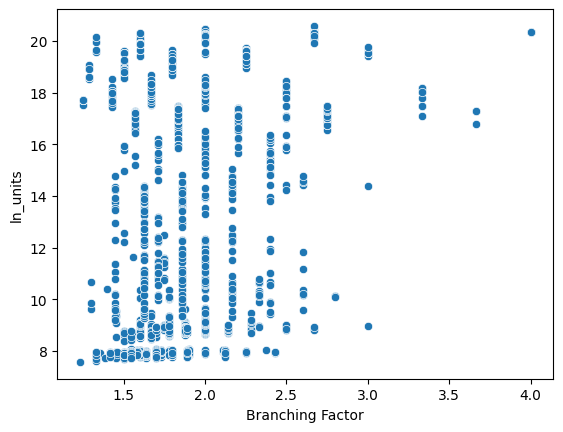

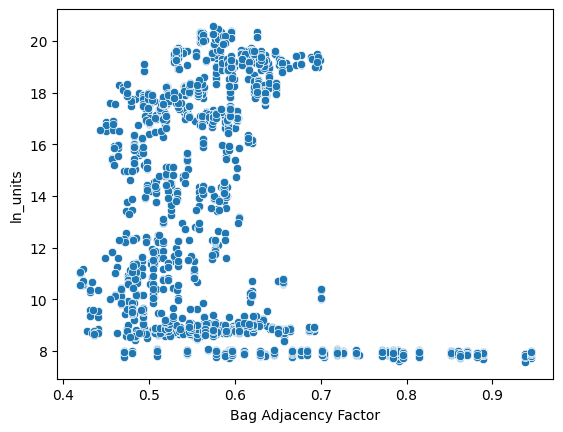

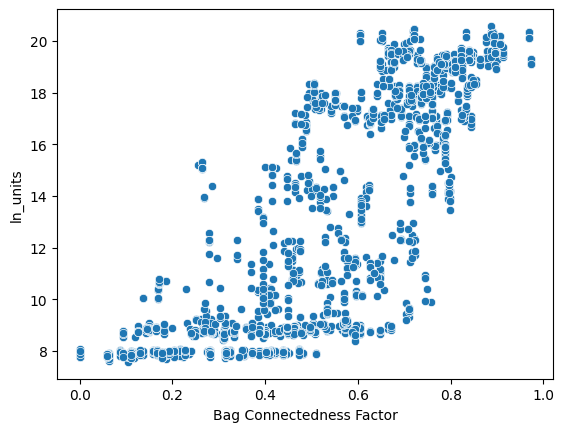

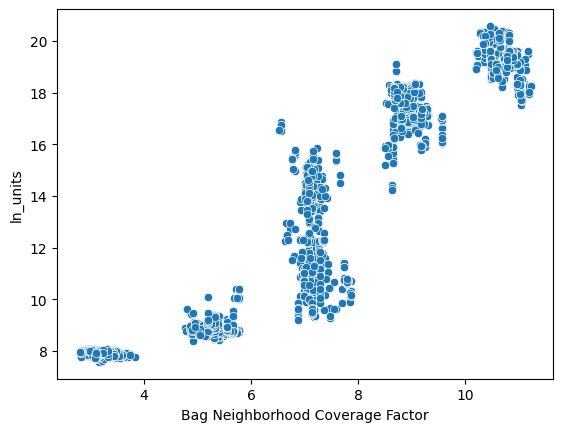

In [4]:
# sns.pairplot(df)
# plt.show()
features = ['Tree Width', 'Decomposition Overhead Ratio', 'Average Depth', 'Sum of Join node distances', 'Branching Factor', 'Bag Adjacency Factor', 'Bag Connectedness Factor', 'Bag Neighborhood Coverage Factor']
for feature in features:
    sns.scatterplot(data=df, x=feature, y="units")
    plt.show()

for feature in features:
    sns.scatterplot(data=df, x=feature, y="ln_units")
    plt.show()

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

features = ['Tree Width', 'Decomposition Overhead Ratio', 'Average Depth', 'Sum of Join node distances', 'Branching Factor', 'Bag Adjacency Factor', 'Bag Connectedness Factor', 'Bag Neighborhood Coverage Factor']

df_train   = df.groupby('Graph ID').head(7)
df_predict = df.groupby('Graph ID').tail(3)

X = df_train[features]
y = df_train['units']
X_predict = df_predict[features]
y_predict = df_predict['units']

317.97002253132456


C:\Users\jerry\AppData\Local\Temp\ipykernel_24580\3164250428.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_predict = df.groupby('Graph ID', group_keys=False).apply(lambda g: g.iloc[l:r])
C:\Users\jerry\AppData\Local\Temp\ipykernel_24580\3164250428.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_predict = df.groupby('Graph ID', group_keys=False).apply(lambda g: g.iloc[l:r])
C:\Users\jerry\A

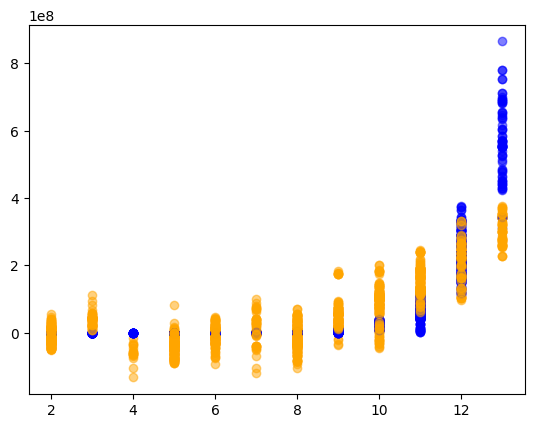

In [63]:
def simpleLinearRegression(df_train, df_predict):
    X = df_train[features]
    y = df_train['units']
    X_predict = df_predict[features]
    y_predict = df_predict['units']
    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X_predict)
    
    mse = mean_squared_error(y_predict, predictions)
    plt.scatter(X_predict['Tree Width'], y_predict  , color = 'blue'  , alpha = 0.5)
    plt.scatter(X_predict['Tree Width'], predictions, color = 'orange', alpha = 0.5)
    return mse
    # print(f"MSE: {mse / 1e14}")
    # plt.show()

mse = 0
for i in range(5):
    l=i*2
    r=l+2
    df_predict = df.groupby('Graph ID', group_keys=False).apply(lambda g: g.iloc[l:r])
    df_train = df.drop(df_predict.index)
    mse += simpleLinearRegression(df_train, df_predict)

print(mse / 1e14)
plt.show()

1067.1065305546956


C:\Users\jerry\AppData\Local\Temp\ipykernel_24580\1037124119.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_predict = df.groupby('Graph ID', group_keys=False).apply(lambda g: g.iloc[l:r])
C:\Users\jerry\AppData\Local\Temp\ipykernel_24580\1037124119.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_predict = df.groupby('Graph ID', group_keys=False).apply(lambda g: g.iloc[l:r])
C:\Users\jerry\A

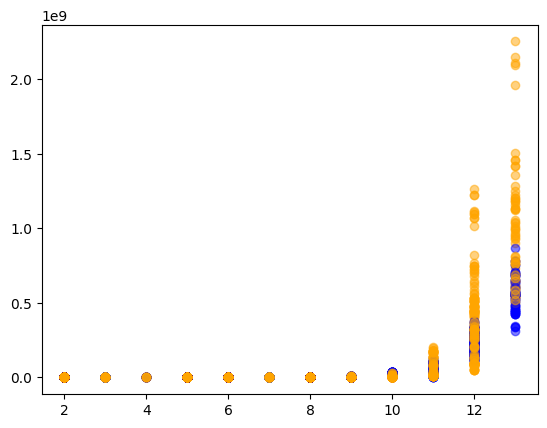

In [64]:
def logLinearRegression(df_train, df_predict):
    X = df_train[features]
    y = df_train['units']
    X_predict = df_predict[features]
    y_predict = df_predict['units']
    y_log = np.log(y)
    model = LinearRegression()
    model.fit(X, y_log)
    log_predictions = model.predict(X_predict)
    predictions = np.exp(log_predictions)

    mse = mean_squared_error(y_predict, predictions)
    plt.scatter(X_predict['Tree Width'], y_predict  , color = 'blue'  , alpha = 0.5)
    plt.scatter(X_predict['Tree Width'], predictions, color = 'orange', alpha = 0.5)
    return mse
    # print(f"MSE: {mse / 1e14}")
    # plt.show()

mse = 0
for i in range(5):
    l=i*2
    r=l+2
    df_predict = df.groupby('Graph ID', group_keys=False).apply(lambda g: g.iloc[l:r])
    df_train = df.drop(df_predict.index)
    mse += logLinearRegression(df_train, df_predict)

print(mse / 1e14)
plt.show()

C:\Users\jerry\AppData\Local\Temp\ipykernel_24580\3695572778.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_predict = df.groupby('Graph ID', group_keys=False).apply(lambda g: g.iloc[l:r])
C:\Users\jerry\AppData\Local\Temp\ipykernel_24580\3695572778.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_predict = df.groupby('Graph ID', group_keys=False).apply(lambda g: g.iloc[l:r])
C:\Users\jerry\A

53.14502163753618


C:\Users\jerry\AppData\Local\Temp\ipykernel_24580\3695572778.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_predict = df.groupby('Graph ID', group_keys=False).apply(lambda g: g.iloc[l:r])


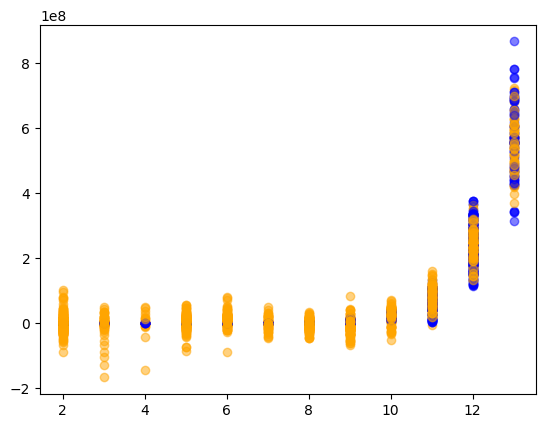

In [67]:
def polynomialLinearRegression(df_train, df_predict):
    X = df_train[features]
    y = df_train['units']
    X_predict = df_predict[features]
    y_predict = df_predict['units']
    poly = PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    predictions = model.predict(poly.fit_transform(X_predict))

    mse = mean_squared_error(y_predict, predictions)
    plt.scatter(X_predict['Tree Width'], y_predict  , color = 'blue'  , alpha = 0.5)
    plt.scatter(X_predict['Tree Width'], predictions, color = 'orange', alpha = 0.5)
    return mse
    # print(f"MSE: {mse / 1e14}")
    # plt.show()
    
mse = 0
for i in range(5):
    l=i*2
    r=l+2
    df_predict = df.groupby('Graph ID', group_keys=False).apply(lambda g: g.iloc[l:r])
    df_train = df.drop(df_predict.index)
    mse += polynomialLinearRegression(df_train, df_predict)

print(mse / 1e14)
plt.show()

C:\Users\jerry\AppData\Local\Temp\ipykernel_24580\3695572778.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_predict = df.groupby('Graph ID', group_keys=False).apply(lambda g: g.iloc[l:r])
C:\Users\jerry\AppData\Local\Temp\ipykernel_24580\3695572778.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_predict = df.groupby('Graph ID', group_keys=False).apply(lambda g: g.iloc[l:r])
C:\Users\jerry\A

53.14502163753618


C:\Users\jerry\AppData\Local\Temp\ipykernel_24580\3695572778.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_predict = df.groupby('Graph ID', group_keys=False).apply(lambda g: g.iloc[l:r])


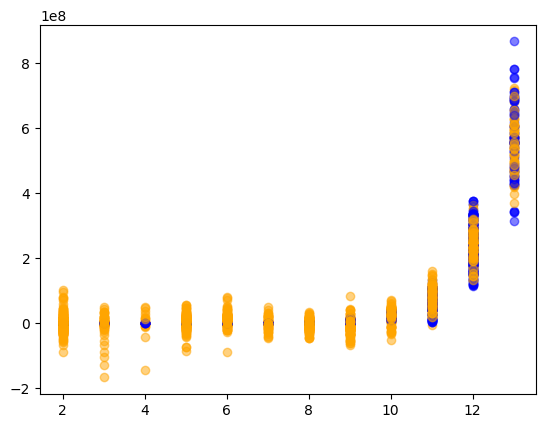

In [71]:
def polynomialLinearRegression(df_train, df_predict):
    X = df_train[features]
    y = df_train['units']
    X_predict = df_predict[features]
    y_predict = df_predict['units']
    poly = PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    predictions = model.predict(poly.fit_transform(X_predict))

    mse = mean_squared_error(y_predict, predictions)
    plt.scatter(X_predict['Tree Width'], y_predict  , color = 'blue'  , alpha = 0.5)
    plt.scatter(X_predict['Tree Width'], predictions, color = 'orange', alpha = 0.5)
    return mse
    # print(f"MSE: {mse / 1e14}")
    # plt.show()
    
mse = 0
for i in range(5):
    l=i*2
    r=l+2
    df_predict = df.groupby('Graph ID', group_keys=False).apply(lambda g: g.iloc[l:r])
    df_train = df.drop(df_predict.index)
    mse += polynomialLinearRegression(df_train, df_predict)

print(mse / 1e14)
plt.show()